In [14]:
import numpy
import pandas as pd
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df = df.dropna(subset=['salary_year_avg'])
top_jobs = 6
top_skills = 8

In [15]:
top_jobs_list = df['job_title_short'].value_counts().head(top_jobs).index.tolist()
top_jobs_list

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [16]:
median_salaries = df.groupby('job_title_short')['salary_year_avg'].median()
median_salaries

job_title_short
Business Analyst              85000.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Data Engineer                125000.0
Data Scientist               127500.0
Machine Learning Engineer    106415.0
Senior Data Analyst          111175.0
Senior Data Engineer         147500.0
Senior Data Scientist        155500.0
Software Engineer             99150.0
Name: salary_year_avg, dtype: float64

In [17]:
median_salaries_sorted = median_salaries.sort_values(ascending=False)
median_salaries_sorted

job_title_short
Senior Data Scientist        155500.0
Senior Data Engineer         147500.0
Data Scientist               127500.0
Data Engineer                125000.0
Senior Data Analyst          111175.0
Machine Learning Engineer    106415.0
Software Engineer             99150.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Business Analyst              85000.0
Name: salary_year_avg, dtype: float64

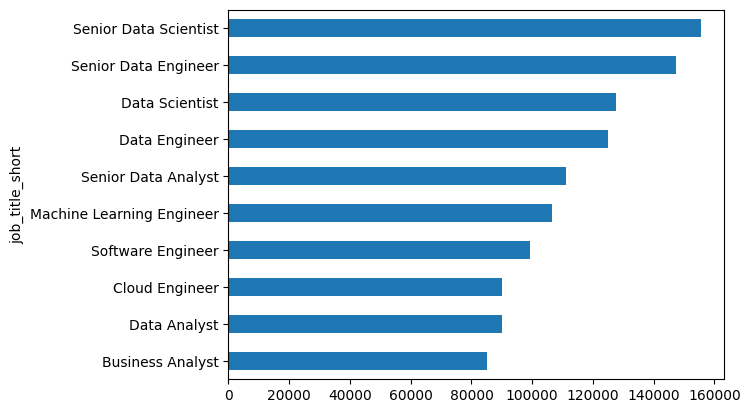

In [18]:
median_salaries_sorted.plot(kind='barh')
plt.gca().invert_yaxis()

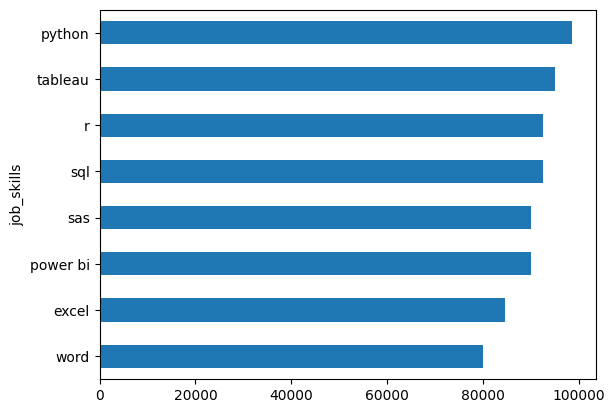

In [22]:
df_DA = df[df['job_title_short'] == 'Data Analyst']
df_DA_exploded = df_DA.explode('job_skills')
top_DA_skills = df_DA_exploded['job_skills'].value_counts().head(top_skills).index.to_list()
df_DA_exploded_top = df_DA_exploded.copy()
df_DA_exploded_top['top_skill'] = df_DA_exploded['job_skills'].apply(lambda x: x in top_DA_skills)
df_DA_exploded_top = df_DA_exploded_top[df_DA_exploded_top['top_skill'] == True]
df_DA_exploded_top.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).plot(kind='barh')
plt.gca().invert_yaxis()

In [24]:
top_pay_DA_skills = df_DA_exploded.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False)
top_pay_DA_skills

job_skills
svn              400000.000000
solidity         179000.000000
dplyr            167500.000000
terraform        163782.000000
gitlab           163782.000000
                     ...      
vb.net            60000.000000
macos             54359.369141
graphql           53014.000000
ruby on rails     51059.000000
trello            50325.035156
Name: salary_year_avg, Length: 177, dtype: float64

In [25]:
top_pay_DA_skills = top_pay_DA_skills.head(top_skills)
top_pay_DA_skills

job_skills
svn          400000.0
solidity     179000.0
dplyr        167500.0
terraform    163782.0
gitlab       163782.0
couchbase    160515.0
datarobot    155485.5
golang       155000.0
Name: salary_year_avg, dtype: float64

In [26]:
top_pay_DA_skills = top_pay_DA_skills.index.to_list()
top_pay_DA_skills

['svn',
 'solidity',
 'dplyr',
 'terraform',
 'gitlab',
 'couchbase',
 'datarobot',
 'golang']

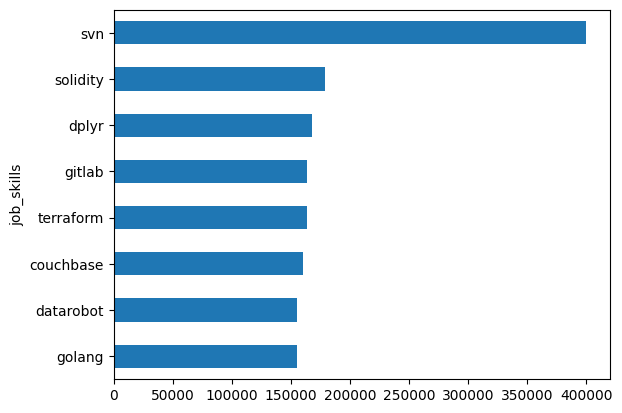

In [28]:
df_DA_exploded_top_pay = df_DA_exploded.copy()
df_DA_exploded_top_pay['top_skill'] = df_DA_exploded_top_pay['job_skills'].apply(lambda x: x in top_pay_DA_skills)
df_DA_exploded_top_pay = df_DA_exploded_top_pay[df_DA_exploded_top_pay['top_skill'] == True]
df_DA_exploded_top_pay.groupby('job_skills')['salary_year_avg'].median().sort_values(ascending=False).plot(kind='barh')
plt.gca().invert_yaxis()